In [55]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier

os.getcwd()
os.chdir('/Users/yunwang/Documents/research/Jiook_AD/papers/idp_jiook_local/braindata')
dd =pd.read_csv("data_2_conn.csv",header=0)
data=np.array(dd)
#print(data.shape)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]
#features=data[:,11:data.shape[1]]
#features = features.transpose()
X = stats.zscore(X)
#print(features.shape)
y=data[:,6]
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)
# print(ind_num.shape)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

       # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

#X=X.reshape(X.size,1)
#X=X.astype(np.float64,copy=False)
np.isnan(X).any()
#feature_num=features.shape[1]
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
clf = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
n_features = [2,5,10,20,40,50,70,80,100,1000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000,15000,25000]
n_features.sort()

for i in n_features:
#     #print(i)
    
#     #lsvc = LinearSVC(C=J[i],penalty="l1", dual=True).fit(X, y)
#     #model = SelectFromModel(lsvc, prefit=True)
#     #features = model.transform(X)
#     clf = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)
#     clf = clf.fit(X, y)
#     importances = forest.feature_importances_
       
    index=indices[0:i]
    features=X[:,index]
#     clf.feature_importances_ 

#     model = SelectFromModel(clf, threshold=0.6,prefit=True)
#     features = model.transform(X)
#     features.shape               
#     #features=features.reshape(features.size,1)
#     #features=features.astype(np.float64,copy=false)
#     np.isnan(features).any()
    feature_num=features.shape[1]
    print(feature_num)
    
  
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    for runs in range(2):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []
        
        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)

        skf = StratifiedKFold(n_splits=10)
        for train_index, test_index in skf.split(features, y):
                    train_data, test_data = features[train_index], features[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]

                    strat_labels = np.append(strat_labels, test_labels)

                    log = logistic.fit(train_data, train_labels)
                    log_prob = log.decision_function(test_data)
                    log_acc = log.score(test_data, test_labels)

                    #f1 calculation
                    y_pred = logistic.predict(test_data)
                    log_f1 = f1_score(test_labels, y_pred)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)
                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data, train_labels)
                    svm_acc = rbf.score(test_data, test_labels)
                    svm_prob = rbf.decision_function(test_data)

                    #f1 calculation
                    y_pred = rbf.predict(test_data)
                    svm_f1 = f1_score(test_labels, y_pred)
                    #print('SVM Accuracy: %f' % svm_acc)
                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)

                    base_labels = np.append(base_labels, strat_labels)
                    lr_all_scores = np.append(lr_all_scores, lr_scores)
                    lr_fold_avg = np.mean(lr_accuracies)
                    lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                    svm_all_scores = np.append(svm_all_scores, svm_scores)
                    svm_fold_avg = np.mean(svm_accuracies)
                    svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                    #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                    #print('SVM Regression Accuracy: %f' % svm_acc_avg)
    feature_num_all=np.append(feature_num_all,feature_num)
    print(np.mean(lr_all_accs))
    print(np.mean(svm_all_accs))      
    lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
    svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
    lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
    svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))

2
0.932205988456
0.950797178131
5
0.914844436428
0.944686507937
10
0.909174162257
0.924765873016
20


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.808172518839
0.855822109989
40
0.819033068783
0.814718213885
50
0.749146905564
0.749924242424
70
0.71741289883
0.792102653519
80
0.784705707872
0.809139249639
100
0.854555796056
0.885240420074
500
0.927256734007
0.980951058201
1000
0.842160694244
0.973305675806
3000
0.810688031105
0.962688271605
4000
0.787795614879
0.952043330127
5000
0.790141293891
0.941241301908
6000
0.808743666827
0.921070666987
7000
0.794207070707
0.942352413019
8000
0.763845518679
0.942352413019
9000
0.76758008658
0.929361792528
10000
0.746065215649
0.942352413019
15000
0.746065215649
0.912501523168
20000
0.763436147186
0.931426487093
25000
0.74590007215
0.935161054994
30000
0.719214566298
0.930371372455


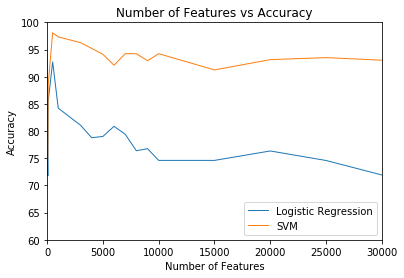

[ 1.          1.          0.93333333  0.93333333  0.92307692  0.92307692
  0.92307692  0.83333333  0.28571429  1.          1.          0.93333333
  0.93333333  0.92307692  0.92307692  0.92307692  0.83333333  0.28571429]
LR accuracy Avg: 0.804450061344989
LR accuracy Standard Deviation: 0.0634464747111312
LR f1s Avg : 0.6930882047761844
LR f1s Standard Deviation: 0.3245284776138592
SVM Avg: 0.9097554879366474
SVM Standard Deviation: 0.059420826260310436
SVM f1s Avg : 0.7981302407453302
SVM f1s Standard Deviation: 0.04896847349004875


In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot( (feature_num_all), lr_all_feature*100, lw=1, label='Logistic Regression')
plt.plot( (feature_num_all), svm_all_feature*100, lw=1, label='SVM')
plt.xlim([0, 30000])
plt.ylim([60, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
#plt.savefig('AD_SMI_Conn_only_2.eps')
plt.show()

svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
#print(lr_all_accs)

In [47]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

(21,)

In [12]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline


(146, 71)

In [41]:
X.shape

(101, 33700)

In [51]:
X.shape

(98, 102)

In [19]:
os.getcwd()
os.chdir('../idp_jiook_local/braindata')

FileNotFoundError: [Errno 2] No such file or directory: '../idp_jiook_local/braindata'

In [24]:
lr_all_accs.shape

(100,)

In [6]:
np.isnan(features)

array([], shape=(98, 0), dtype=bool)

In [6]:
print(range(10))

range(0, 10)


In [14]:
np.log(20000)

9.9034875525361272